In [146]:
import pandas as pd 

from sklearn.datasets import fetch_california_housing 

housing = fetch_california_housing(as_frame=True) 

df = housing['data'].join(housing['target']) 

df.head() 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [161]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### a. Are there any missing values or issues with data types? 

In [202]:
df.duplicated().any()

False

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [152]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [153]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


There are no missing value in the dataset and the all the variables are numeric of datatype float64.

### b.Which columns are most and least correlated with the target? (MedHouseVal) 

In [ ]:
corr_matrix = df.corr()
print(corr_matrix["MedHouseVal"].sort_values(ascending=False))

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


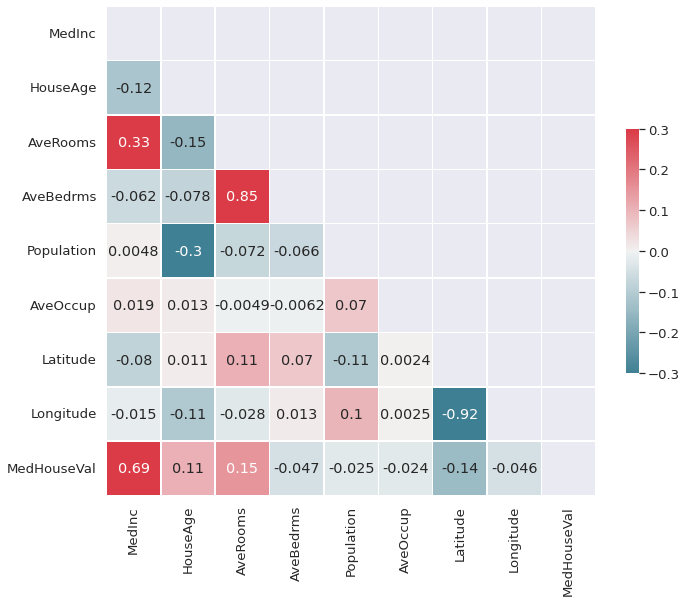

In [154]:
# Create the correlation matrix
corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


fig, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr,mask=mask,cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True,    
    vmax=.3,vmin=-.3,     
    center=0, square=True,   
    linewidths=.5,cbar_kws={"shrink": .5})

The corelation values lies within the range of -1 to +1,
 The values closer to 0 indicate no correlation between the target variable and the predictors whereas values closer to ±1 indicate a high correlation. 
So, the red and dark teal boxes indicate high correlation while the ones closer to light teal show least to no correlation.

The columns like MedInc and AveRooms are most positively co-correlated with the target MedHouseVal,followed by HouseAge and Latitute,AveBedrms,Longitute are most negatively correlated. The columns like AveOccup,Population are least correlated with the target(MedHouseVal) .

In [164]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

Lets take a closer look

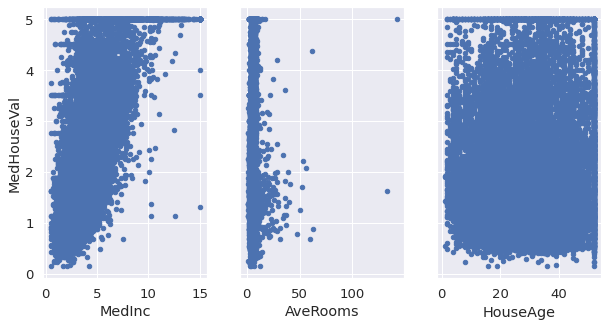

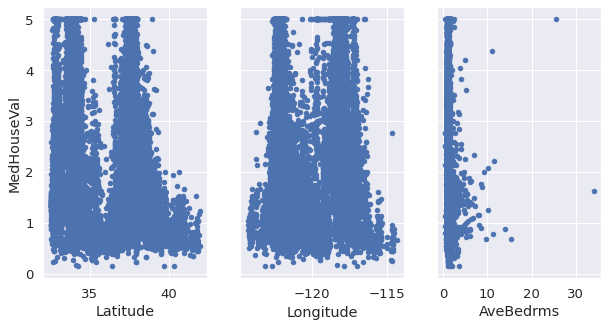

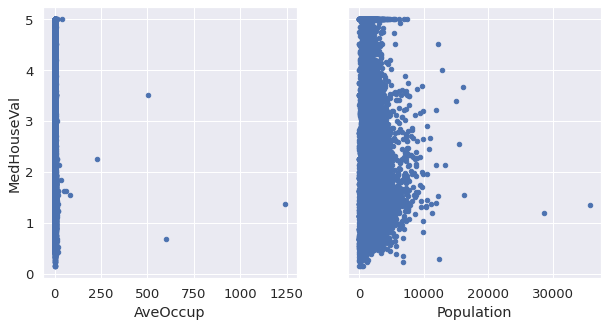

In [169]:
#plot graphs
fig,axs=plt.subplots(1,3,sharey=True)
df.plot(kind='scatter',x='MedInc',y='MedHouseVal',ax=axs[0],figsize=(10,5))
df.plot(kind='scatter',x='AveRooms',y='MedHouseVal',ax=axs[1],figsize=(10,5))
df.plot(kind='scatter',x='HouseAge',y='MedHouseVal',ax=axs[2],figsize=(10,5))


#plot graphs
fig,axs=plt.subplots(1,3,sharey=True)
df.plot(kind='scatter',x='Latitude',y='MedHouseVal',ax=axs[0],figsize=(10,5))
df.plot(kind='scatter',x='Longitude',y='MedHouseVal',ax=axs[1],figsize=(10,5))
df.plot(kind='scatter',x='AveBedrms',y='MedHouseVal',ax=axs[2],figsize=(10,5))


#plot graphs
fig,axs=plt.subplots(1,2,sharey=True)
df.plot(kind='scatter',x='AveOccup',y='MedHouseVal',ax=axs[0],figsize=(10,5))
df.plot(kind='scatter',x='Population',y='MedHouseVal',ax=axs[1],figsize=(10,5))


The above graphs shows that only MedInc and MedHouseVal has a linear relationship.

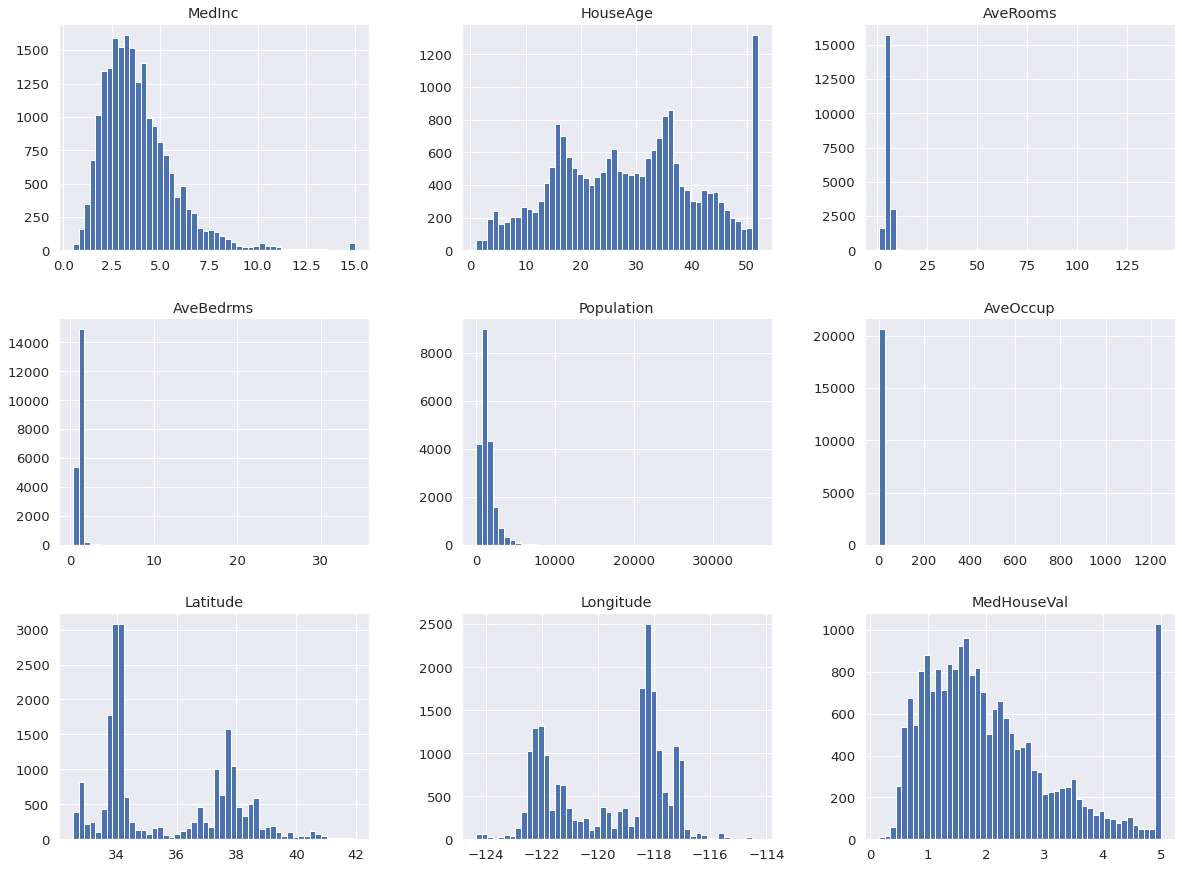

In [173]:
df.hist(bins=50, figsize=(20,15))
plt.show()

The histogram representing the distribution of data per feature. The features such as AveBedrms, AveOccup, AveRooms and Population are highly scewed and can have outliers. Also , these features have different scales which will require to be Normalized before model building . AvgHouseAge is normally distributed.


Number of outliers in column MEDINC: 681
Maximum outlier value: 15.0001
Minimum outlier value: 8.0137 



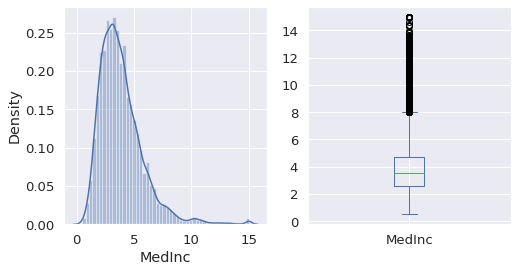


Number of outliers in column HOUSEAGE: 0
Maximum outlier value: nan
Minimum outlier value: nan 



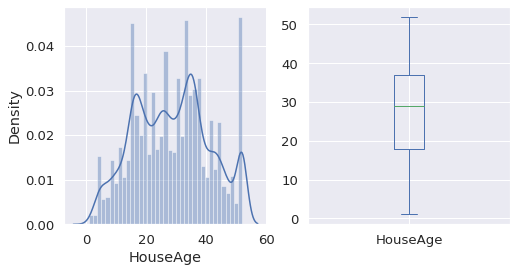


Number of outliers in column AVEROOMS: 511
Maximum outlier value: 141.9090909090909
Minimum outlier value: 0.8461538461538461 



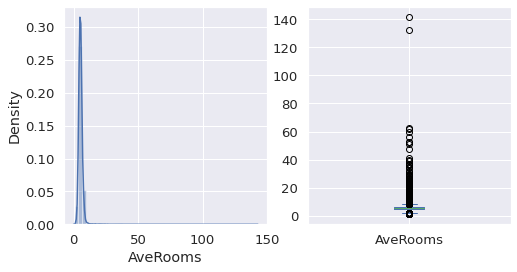


Number of outliers in column AVEBEDRMS: 1424
Maximum outlier value: 34.06666666666667
Minimum outlier value: 0.3333333333333333 



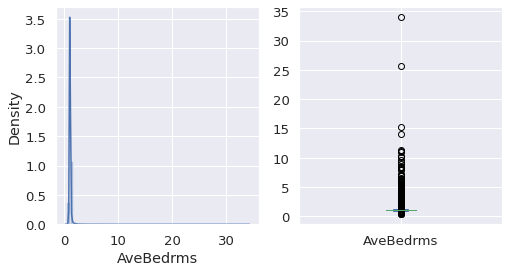


Number of outliers in column POPULATION: 1196
Maximum outlier value: 35682.0
Minimum outlier value: 3134.0 



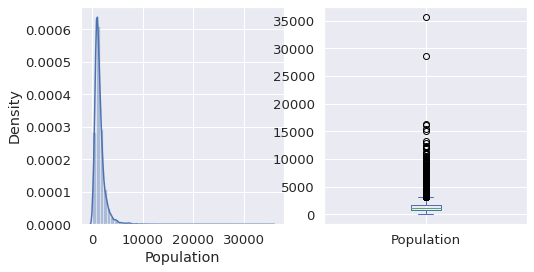


Number of outliers in column AVEOCCUP: 711
Maximum outlier value: 1243.3333333333333
Minimum outlier value: 0.6923076923076923 



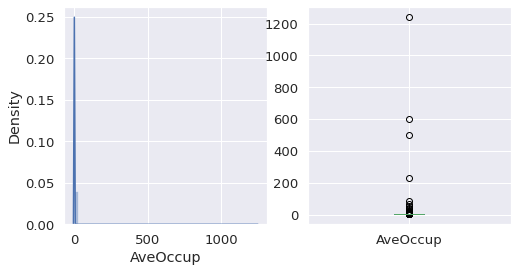


Number of outliers in column LATITUDE: 0
Maximum outlier value: nan
Minimum outlier value: nan 



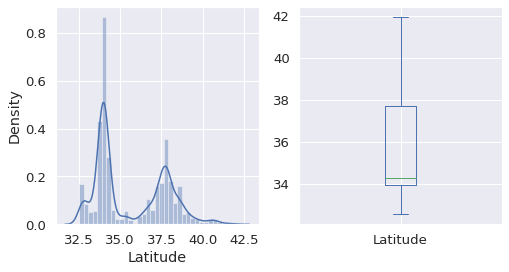


Number of outliers in column LONGITUDE: 0
Maximum outlier value: nan
Minimum outlier value: nan 



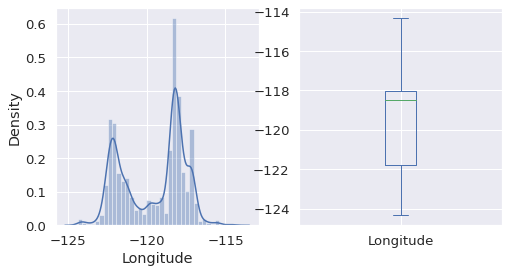


Number of outliers in column MEDHOUSEVAL: 1071
Maximum outlier value: 5.00001
Minimum outlier value: 4.827 



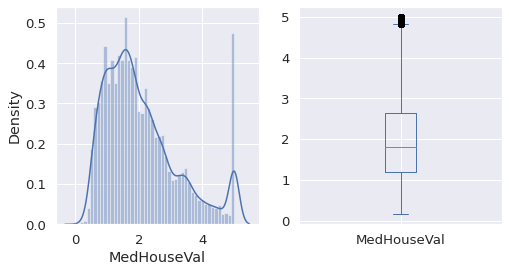

In [ ]:
def find_outliers_IQR(dfCol):
  Q1=dfCol.quantile(0.25)
  Q3=dfCol.quantile(0.75)
  IQR=Q3-Q1
  outliers = dfCol[((dfCol<(Q1-1.5*IQR)) | (dfCol>(Q3+1.5*IQR)))]
  
  return outliers

for col in df.columns:
  outliers = find_outliers_IQR(df[col])
  print("\nNumber of outliers in column {}: ".format(col.upper()) + str(len(outliers)))
  print("Maximum outlier value: "+ str(outliers.max()))
  print("Minimum outlier value: "+ str(outliers.min()),'\n')
  plt.figure(1)
  plt.subplot(121) 
  sns.distplot(df[col]); 
  plt.subplot(122)
  df[col].plot.box(figsize=(8,4)) 
  plt.show()



From the previous boxplots, we see that there are several features with outliers. These features are:



*   MedInc: median income 


*   MedHouseVal: house prices
*   AveOccup: Average Occupation



*   AveRooms: average number of rooms

*   AveBedrms: average number of bedrooms



*   Population: population









In [175]:
df[["AveRooms", "AveBedrms", "AveOccup", "Population","MedInc","MedHouseVal"]].describe()

,AveRooms,AveBedrms,AveOccup,Population,MedInc,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,3.070655,1425.476744,3.870671,2.068558
std,2.474173,0.473911,10.386050,1132.462122,1.899822,1.153956
min,0.846154,0.333333,0.692308,3.000000,0.499900,0.149990
25%,4.440716,1.006079,2.429741,787.000000,2.563400,1.196000
50%,5.229129,1.048780,2.818116,1166.000000,3.534800,1.797000
75%,6.052381,1.099526,3.282261,1725.000000,4.743250,2.647250
max,141.909091,34.066667,1243.333333,35682.000000,15.000100,5.000010


### c.Find a feature that seems most ripe for removing outliers and remove those rows from the dataframe. 

The median income distribution looks fairly normally distributed , but it has long tail which indicates that there are people who might have high salary.
The MedHouseVal also have a long tail, also it seems most price with above 5 are imputed with 5.

Whereas , for AveRooms , AveBedrms, Population , AveOccup .. The distribution from histogram above is highly skewed and has wide range of data which indicates outliers and can be harmful for our future model.

Also , from the description of data above, when we analyse the max and 75% values for each of these attributes, we can clearly observe a significant difference.

So , the features AveRooms , AveBedrms, Population , AveOccup should be focused and will be most ripe for removing outliers from dataset.

In [176]:
df.shape

(20640, 9)

In [177]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

#### Removal of Outliers :Remove those rows which are outliers from the dataframe. 

In [178]:
cols = ['AveRooms', 'AveBedrms', 'Population', 'AveOccup'] 

# Calculate quantiles and IQR
Q1 = df[cols].quantile(0.25) 
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
filtered_df = df[condition]


df.shape, filtered_df.shape

((20640, 9), (17348, 9))

(20640, 9), (16312, 9))

### d.If you were to try and remove outliers, how do you ensure an unbiased test set? 

Bias refers to the inaccuracy that occurs when a machine learning model is unable to accurately represent the true relationship between the features and target of the data.
Simple assumptions in linear models, such as linear regression and logistic regression, result in substantial bias. While models with little bias include decision trees and support vector machines.
So , to ensure an unbiased test set , we can use models like decision trees and support vector machines.

Also , we need to properly check which outliers needs to be removed or not.

There are other Ways to handle outliers which can be considered for  unbiased in test dataset like:
1.Capping the outliers’ data.
2.Assign a new value.(Imputation using mean/median)
3.log-transformation 

Also, we should scale the data with MinMaxScaler or use RobustScaler which uses statistics that are robust to outliers(incase they are not removed).We must rescale our data so that all of the features are around the same scale.This is similar to converting between feet and meters. This will improve model accuracy.

### e.     Take a look at the lat and long columns - how can you extract more signal from them? 

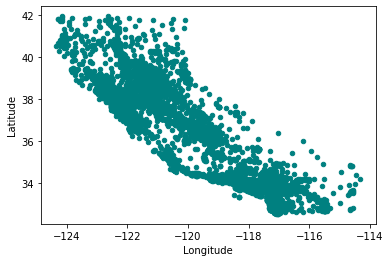

In [ ]:
df.plot(kind="scatter", x="Longitude", y="Latitude",color='teal')

The lat and long column data shows a graphical representation of California state of US.

As features Lat and Long  are negatively corelated with MedHouseVal.Lets check if the we can drive any information based on location(lat and long) about the housing price. 

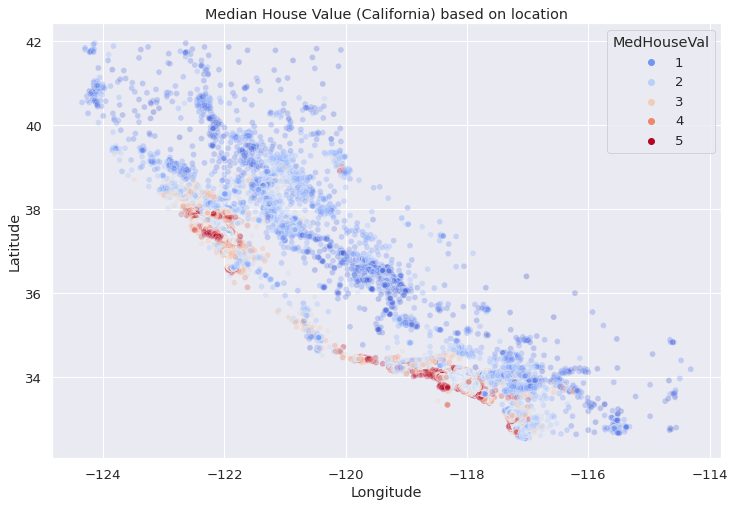

In [181]:
sns.set(rc={'figure.figsize': [12, 8]}, font_scale=1.2)
ax = sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='MedHouseVal', palette='coolwarm', alpha=0.3);
ax.set_title("Median House Value (California) based on location");

Thus , we see that the location of the house is an important factor in its house value(price). It is evident from the above figure that areas closer to the coast and bay near big cities like SanFranciso , San Diego , LA have a higher median house value.

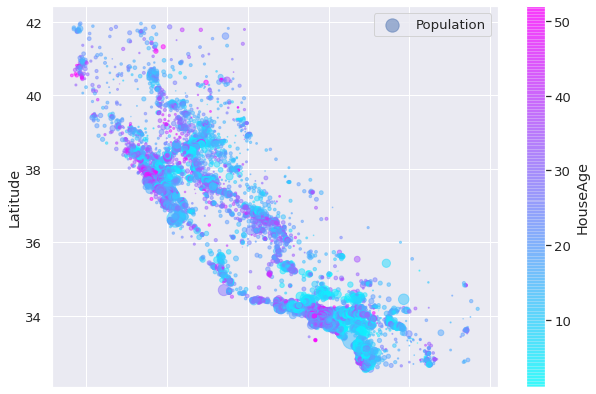

In [195]:
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.5, 
                 s=df["Population"]/100, label="Population", figsize=(10,7),
                 c="HouseAge", cmap=plt.get_cmap("cool"), colorbar=True,)
plt.legend()

As seen in the diagram, which shows the average house age in Californian region, homes in major cities like Los Angeles and San Francisco are typically older. We can also see that the region between Los Angeles and San Diego is where the newest homes are located.

### f.Use your knowledge about the lat and long columns to make a new feature. Plot the result against the target column.

We will make a new column city based on lat and long . As state and country for all records will be California and US , it wont contribute much to the model so , creating a new feature city based on Lat long.

In [196]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [197]:
!pip install geopy 
!pip install Nominatim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [204]:
geo_df =  filtered_df.copy()

In [205]:
geo_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20634,3.7125,28.0,6.779070,1.148256,1041.0,3.026163,39.27,-121.56,1.168
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [206]:
import io
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

def fetch_city(row):
    coord = f"{row['Latitude']}, {row['Longitude']}"
    location = geolocator.reverse(coord, exactly_one=True,timeout=60)
    address = location.raw['address']
    city = address.get('city', '')
    row['city'] = city

    return row

geo_df = geo_df.apply(fetch_city, axis=1)
print(geo_df)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20634  3.7125      28.0  6.779070   1.148256      1041.0  3.026163     39.27   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal     city 

In [216]:
geo_df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,city
20634,3.7125,28.0,6.779070,1.148256,1041.0,3.026163,39.27,-121.56,1.168,
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894,


In [210]:
geo_df.to_csv('geo_df.csv')

There are some empty values obtained from geolocator , so replacing them with nan and then imputing them with closest city to that location.

In [217]:
geo_df['city'] = geo_df['city'].replace('',np.nan)

In [218]:
geo_df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,city
20634,3.7125,28.0,6.779070,1.148256,1041.0,3.026163,39.27,-121.56,1.168,NaN
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,NaN
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,NaN
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,NaN
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894,NaN


In [219]:
geo_df.isnull().sum()

MedInc            0
HouseAge          0
AveRooms          0
AveBedrms         0
Population        0
AveOccup          0
Latitude          0
Longitude         0
MedHouseVal       0
city           7206
dtype: int64

As we see there are empty city values, we will impute the null values with nearest city found.



Creating a dictionary of locations, where key is the name of the city and value is (lat, long) obtained from our dataset.

In [222]:
city_lat_long = {}

for ele in geo_df.iterrows():
    row = ele[1]
    if(pd.notnull(row["city"])):
      city_lat_long[row['city']] = (float(row['Latitude']), float(row['Longitude']))

Creating a function "nearest_city" which will 
Compare a tuple of latitude and longitude to a dictionary of locations, where key is the name of the city and value is (lat, long)  .This function  will return closest city value.

In [225]:
from geopy.distance import vincenty

def nearest_city(location, location_dict):
    closest_location = None
    for city in location_dict.keys():
        distance = vincenty(location, location_dict[city]).kilometers
        if closest_location is None:
            closest_location = (city, distance)
        elif distance < closest_location[1]:
            closest_location = (city, distance)
    return closest_location[0]

In [226]:
geo_df['nearest_city'] = [nearest_city((x, y),city_lat_long) for x, y in zip(geo_df.Latitude, geo_df.Longitude)]

In [227]:
geo_df.city.fillna(geo_df.nearest_city, inplace=True)
del geo_df['nearest_city']

 Thus , a new feature city is created , which is then imputed with nearest city if null. In future , we can even create new features like 'ocean_closeness' (as we saw the houses next to coastal region are highly priced). Also, 'nearest_biggest_city' can be feature engineered.

In [228]:
geo_df.to_csv('final_result.csv')